In [1]:
from qiskit import QuantumCircuit
from qiskit_ibm_provider import IBMProvider

import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from models import VictimParams
from qiskit.result import marginal_counts

In [2]:
provider = IBMProvider()

# IBM Nairobi

## Parameters

In [3]:
job_id = 'chjjk7dnopt07g1nk0n0'

snooper_qubits = (1, 4, 6)
victim_qubits = (3, 5)
ancilla_qubits = (0, 2)
victim_circ_uuid = 'f6bcf9c3-a057-4f9b-acf7-8d804262a33c'

## Fetch data from backend

In [4]:
job = provider.backend.retrieve_job(job_id)

## Analysis

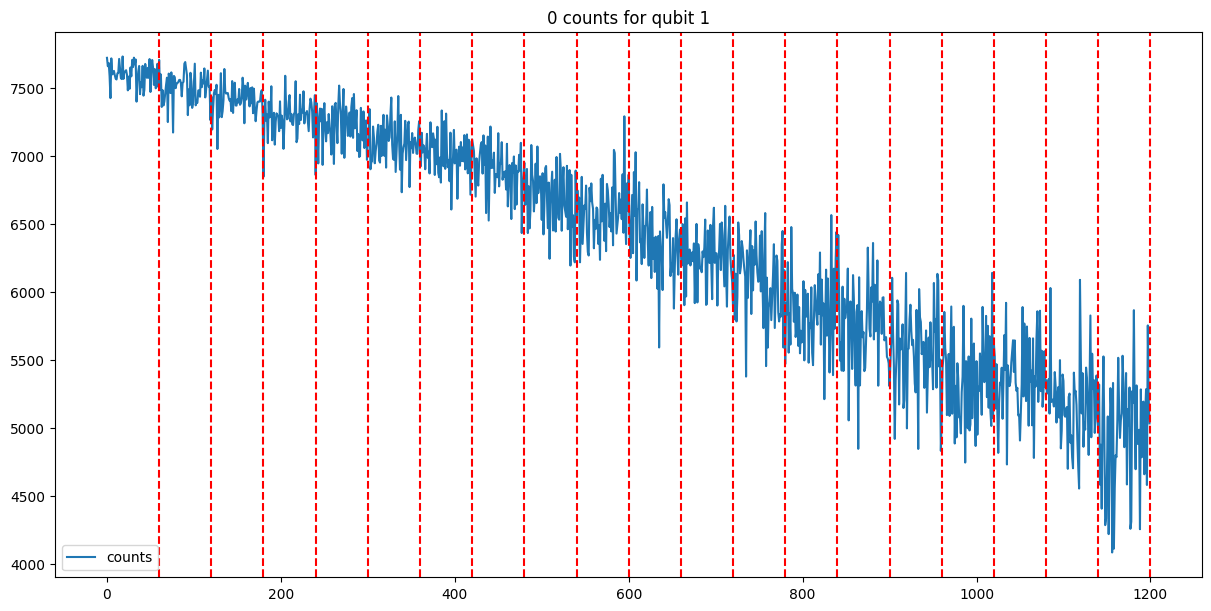

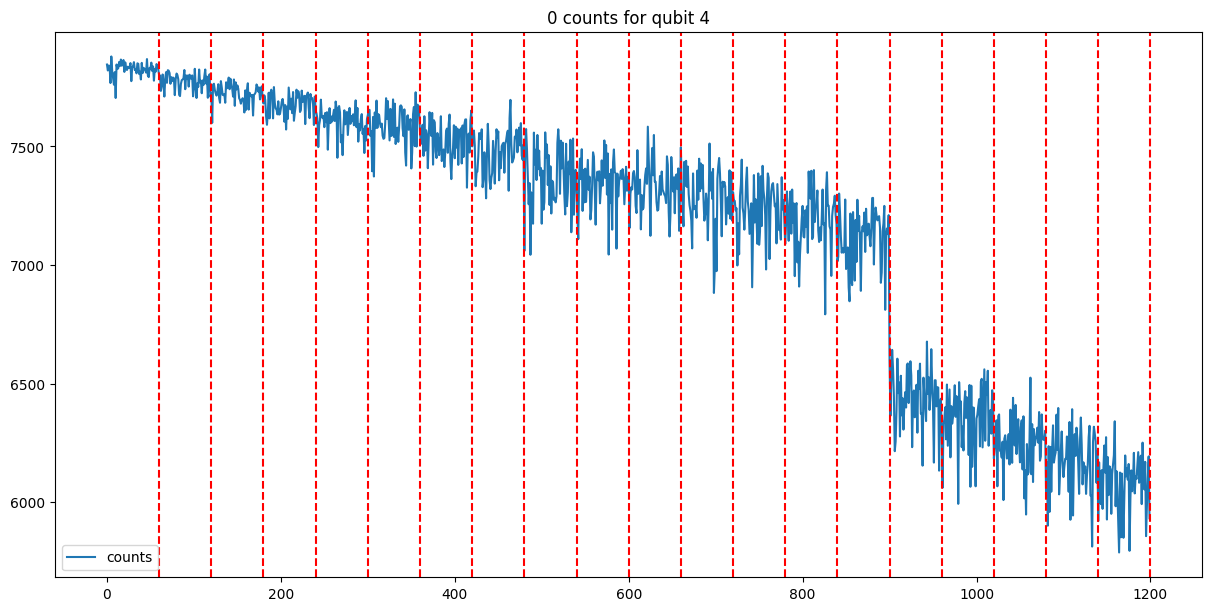

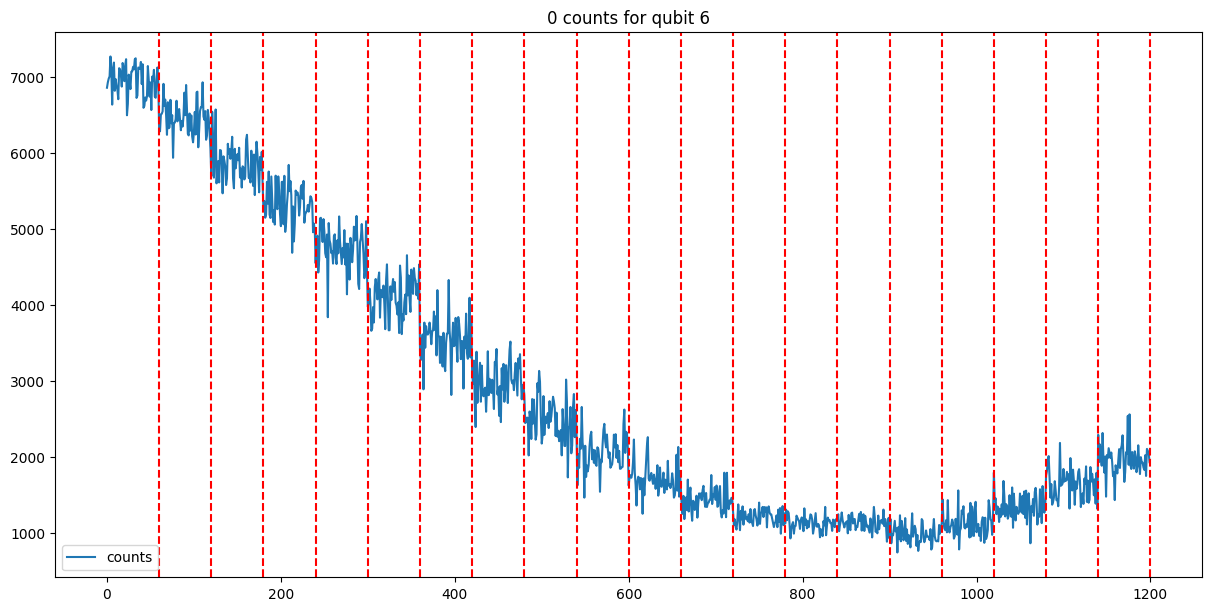

In [6]:
for creg_index, snooper_qubit in enumerate(snooper_qubits):
    counts = pd.DataFrame(marginal_counts(job.result(), [creg_index]).get_counts())['0']
    fig, ax = plt.subplots(layout='constrained', figsize=(12, 6))
    ax.set_title('0 counts for qubit {}'.format(snooper_qubit))
    ax.plot(counts, label='counts')
    period = 60
    for i in range(period, len(counts)+1, period):
        ax.axvline(i, color='red', linestyle='--')
    ax.legend()
    plt.show()
